In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('penguins_simple.csv', sep=";")
df.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie,39.1,18.7,181.0,3750.0,MALE
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,39.3,20.6,190.0,3650.0,MALE


In [6]:
df = df[df['Species'] != 'Chinstrap']

In [7]:
# independent variables, input features, a matrix
X = df[['Culmen Length (mm)', 'Culmen Depth (mm)', 'Sex']]

# dependent variable, target variable, a vector
y = df['Species']

In [8]:
# Split the DataFrame into X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [9]:
X_train.shape, X_test.shape

((198, 3), (67, 3))

In [10]:
from matplotlib import pyplot as plt

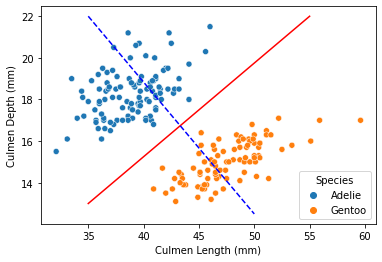

In [12]:
sns.scatterplot(data=X_train, x='Culmen Length (mm)', y='Culmen Depth (mm)', hue=y_train)
plt.plot([35, 55], [13, 22], 'r-')  # decision boundary

slope = 9 / 20  # dy / dx
inv_slope = -20 / 9
plt.plot([35, 50], [22, 12.5], 'b--')  # assumed perpendicular, orthogonal
# normal vector

### The we'd like to have: 

* project our data points to the normal vector (blue)
* calculate the distance to the decision boundary
* convert the distance to a probability
* model parameters are the position and slope of the decision boundary and normal vector


### Feature Engineering

Will be based on your EDA.

##### Skip: because all features are numbers and there are no NaNs

In [14]:
X_train['Sex'] = X_train['Sex'].replace({'MALE': 0, 'FEMALE': 1})
X_test['Sex'] = X_test['Sex'].replace({'MALE': 0, 'FEMALE': 1})
X_train.head(3)


/Users/naimboraatlay/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/naimboraatlay/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Culmen Length (mm),Culmen Depth (mm),Sex
86,34.0,17.1,1
329,46.8,14.3,1
38,44.1,19.7,0


In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
model = LogisticRegression() #initialize the model
model.fit(X_train, y_train)   # trains the model:
# the LogReg looks at the data, determines the model parameters that position the 
# decision boundary in such a way that separates the training data best
model.score(X_train, y_train) # calculates accuracy

1.0

### Accuracy: Ratio of correct predictions over all cases.

### Optimize

let's not do that now
try different combinations of features

### Testing your model on the test data
the model has not seen this data yet

In [19]:
model.score(X_test, y_test)
# you want the training + test score to be very similar

0.9850746268656716

### Testing the model

In [20]:
import numpy as np

# these are numbers we made up
# in a real world example this could be user data
new_penguins = np.array([[40, 13, 1], [55, 22, 0], [35, 20, 1]])
model.predict(new_penguins)

array(['Gentoo', 'Gentoo', 'Adelie'], dtype=object)

In [21]:
p = model.predict_proba(new_penguins).round(3)
pd.DataFrame(p, columns=['p(Adelie)', 'p(Gentoo)'], index=['Skipper', 'Kowalski', 'Private'])

,p(Adelie),p(Gentoo)
Skipper,0.047,0.953
Kowalski,0.078,0.922
Private,1.000,0.000


#### Inspect the model parameters

In [23]:
model.coef_    # w1, w2, w3

array([[ 1.02686092, -1.75199828,  0.17605203]])

In [24]:
model.intercept_  # w0

array([-15.46283637])

In [26]:
# example calculation
x1 = 40
x2 = 13
w1 = 1.00987271
w2 = -1.77671059
w0 = -14.2462174

x = w1*x1 + w2*x2 + w0
p = 1 / (1+np.exp(-x))
p

0.9548452294655053